In [82]:
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
import os
from sklearn.datasets import load_files
import shutil
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import mglearn

# Main code below from Andreas C. Müller & Sarah Guido

# Calculates logistic regression for dataset

In [127]:
#take only positive and negative reviews, ignoring the unsup label
if os.path.isdir('aclImdb/train/unsup') == True:
    shutil.rmtree('aclImdb/train/unsup')
    
#takes data as the files and test as their folder
reviews_train = load_files("aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("text_train[1]:\n{}".format(text_train[1]))

type of text_train: <class 'list'>
length of text_train: 25000
text_train[1]:
b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decisio

In [4]:
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

C:\Users\hlovi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hlovi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\hlovi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hlovi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best cross-validation score: 0.89


In [5]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset
X_train = vectorizer.transform(text_train)
# find maximum value for each of the features over the dataset
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())

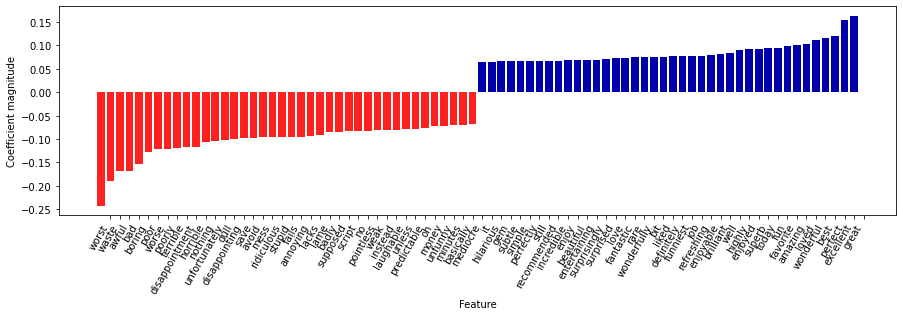

In [6]:
mglearn.tools.visualize_coefficients(
grid.best_estimator_.named_steps["logisticregression"].coef_,
feature_names, n_top_features=40)

# BP Files

Súmula Vinculante 10: Viola a cláusula de reserva de plenário (CF, artigo 97) a decisão de órgão fracionário de tribunal que, embora não declare expressamente a inconstitucionalidade de lei ou ato normativo do Poder Público, afasta sua incidência, no todo ou em parte.

Súmula Vinculante 37: Não cabe ao Poder Judiciário, que não tem função legislativa, aumentar vencimentos de servidores públicos sob o fundamento de isonomia

In [26]:
df = pd.read_csv('metadata1037.csv') 
df

,doc_id,publication_time,bp,doc_type,minister
0,20180801_ARE_1089098_314824299,2018-08-01,[10],ARE,rosa weber
1,19700101_Rcl_15658_4390167,1970-01-01,[10],Rcl,ricardo lewandowski
2,19700101_Rcl_10813_3480577,1970-01-01,[10],Rcl,gilmar mendes
3,20181116_Rcl_29884_15339061172,2018-11-16,[10],Rcl,luiz fux
4,20160418_Rcl_22207_309236968,2016-04-18,[10],Rcl,dias toffoli
...,...,...,...,...,...
18640,20180608_Rcl_27063_314542572,2018-06-08,[37],Rcl,dias toffoli
18641,20180608_Rcl_26924_314543852,2018-06-08,[37],Rcl,dias toffoli
18642,20180608_Rcl_27494_314543089,2018-06-08,[37],Rcl,dias toffoli
18643,20180814_ARE_1142843_314981464,2018-08-14,[37],ARE,celso de mello


In [33]:
ids = list(df['doc_id'])
bp_label = list(df['bp'])
bp_set = list(set(df['bp']))
bp_set

['[10]', '[37]', '[10, 37]']

In [35]:
if os.path.isdir('bp1037') == False:
    os.mkdir('bp1037') 
    
if os.path.isdir('bp1037/10') == False:
    os.mkdir('bp1037/10') 
    
    
if os.path.isdir('bp1037/37') == False:
    os.mkdir('bp1037/37') 

In [36]:
for index in range(len(ids)):
    if bp_label[index] == '[10]':
        string = 'decisions/'+ids[index]+'.txt'
        shutil.move(string, 'bp1037/10')
    elif bp_label[index] == '[37]':
        string = 'decisions/'+ids[index]+'.txt'
        shutil.move(string, 'bp1037/37')

In [54]:
bp_10_37 = load_files("bp1037")
bp_train, label_train = bp_10_37.data, bp_10_37.target
print("type of text_train: {}".format(type(bp_train)))
print("length of text_train: {}".format(len(bp_train)))
print("text_train[1]:\n{}".format(bp_train[1].decode("utf-8")))

type of text_train: <class 'list'>
length of text_train: 17879
text_train[1]:
DECISÃO

RECLAMAÇÃO. AGRAVO DE INSTRUMENTO DE DECISÃO QUE NÃO ADMITE RECURSO ESPECIAL. NECESSIDADE DE JUNTADA DO COMPROVANTE DO PAGAMENTO DE PORTE DE REMESSA E RETORNO. ACÓRDÃO RECLAMADO QUE RECONHECE A DEFICIÊNCIA NA FORMAÇÃO DO AGRAVO DE INSTRUMENTO EM OBSERVÂNCIA AO ART. 511 DO CÓDIGO DE PROCESSO CIVIL E À SÚMULA N. 187 DO SUPERIOR TRIBUNAL DE JUSTIÇA. INCIDÊNCIA DO ART. 544 DO CÓDIGO DE PROCESSO CIVIL NÃO AFASTADA. ALEGADO DESCUMPRIMENTO DA SÚMULA VINCULANTE N. 10 DO SUPREMO TRIBUNAL FEDERAL NÃO CONFIGURADO. RECLAMAÇÃO À QUAL SE NEGA SEGUIMENTO.

Relatório

1. Reclamação, sem pedido de medida liminar, ajuizada por Maristela Jesus da Silva, em 4.11.2009, contra ato da Terceira Turma do Superior Tribunal de Justiça que, nos autos do Agravo de Instrumento n. 927.811/DF, teria descumprido a Súmula Vinculante n. 10 do Supremo Tribunal Federal.

O caso

2. Em 27.8.2009, o Relator do Agravo de Instrumento n. 927

# Unmasked

In [94]:
#balances dataset to have same number of bps 10 and 37
bp_10 = [bp_train[index] for index in range(len(label_train)) if label_train[index]==0]
print(len(bp_10),'    ', list(label_train).count(0))

#choose randomly from bp 10 same number elements as bp 37
random_indexes = np.random.permutation(len(bp_10))
bp_10_bal = [bp_10[index] for index in random_indexes[:list(label_train).count(1)]]
print(len(bp_10_bal),'    ', list(label_train).count(1))

#produces the balanced set
bp_37 = [bp_train[index] for index in range(len(label_train)) if label_train[index]==1]
bp_train_bal = bp_10_bal+bp_37
bp_train_bal = np.array(bp_train_bal)
label_train_bal = list(np.zeros(len(bp_10_bal)))+list(np.ones(len(bp_37)))
label_train_bal = np.array(label_train_bal)
print(len(bp_train_bal),'    ', len(label_train_bal))

14661      14661
3218      3218
6436      6436


In [95]:
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(bp_train_bal, label_train_bal)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

C:\Users\hlovi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hlovi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\hlovi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hlovi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best cross-validation score: 0.99


C:\Users\hlovi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset
X_train = vectorizer.transform(bp_train_bal)
# find maximum value for each of the features over the dataset
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())

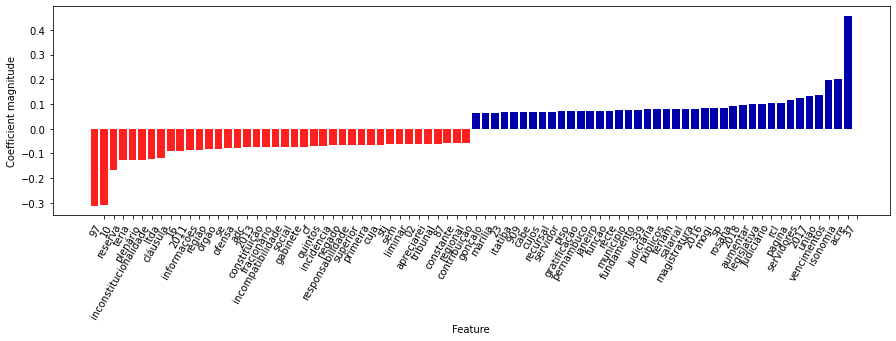

In [97]:
mglearn.tools.visualize_coefficients(
grid.best_estimator_.named_steps["logisticregression"].coef_,
feature_names, n_top_features=40)

# Masked

In [120]:
def masker(dataset):
    '''Substitues all integers in a text dataset by an empty string
    Input: dataset made of texts
    Output: the same dataset made of texts, only with masked integers'''
    masked_set = []
    for index in range(len(dataset)):
        new_string = ''
        for word in range(len(dataset[index])):
            if dataset[index][word].isnumeric()==False:
                new_string += dataset[index][word]
            else:
                new_string += ''
        masked_set.append(new_string)
    return masked_set

In [121]:
uft_dataset = [bp_train_bal[index].decode("utf-8") for index in range(len(bp_train_bal))]

In [122]:
masked_dataset = masker(uft_dataset)
masked_dataset[0]

'RECLAMAÇÃO . SÃO PAULO\n\nRELATOR : MIN. CELSO DE MELLO\nRECLTE.(S) :UNIVERSIDADE DE SÃO PAULO - USP \nADV.(A/S) :OMAR HONG KOH \nRECLDO.(A/S) :TRIBUNAL REGIONAL DO TRABALHO DA ª \n\nREGIÃO \n\nINTDO.(A/S) :CARLA MONELEIDE MOLINA E SILVA \nADV.(A/S) :VANUSA DE FREITAS \nINTDO.(A/S) :EMPRESA LIMPADORA UNIÃO LTDA \n\nDECISÃO: Trata-se de reclamação na qual se alega que o ato \njudicial ora impugnado teria transgredido a autoridade do julgamento \nque esta Suprema Corte proferiu, com efeito vinculante, no exame da \nADC /DF, Rel. Min. CEZAR PELUSO, além de supostamente haver \ndesrespeitado o enunciado constante da Súmula Vinculante nº /STF, que \npossui o seguinte teor:\n\n“Viola a cláusula de reserva de plenário (CF, artigo ) a \ndecisão de órgão fracionário de tribunal que, embora não declare \nexpressamente a inconstitucionalidade de lei ou ato normativo do \npoder público, afasta sua incidência, no todo ou em parte.” (grifei)\n\nSustenta-se, na presente sede processual, que o órgão 

In [123]:
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(masked_dataset, label_train_bal)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

C:\Users\hlovi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hlovi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\hlovi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hlovi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best cross-validation score: 0.98


C:\Users\hlovi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [125]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset
X_train = vectorizer.transform(masked_dataset)
# find maximum value for each of the features over the dataset
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())

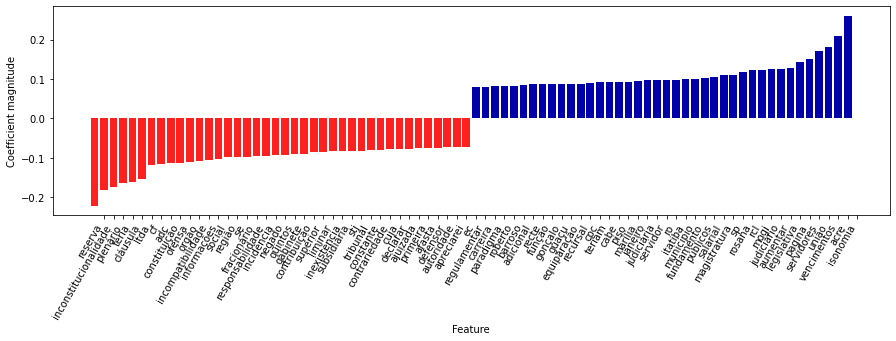

In [126]:
mglearn.tools.visualize_coefficients(
grid.best_estimator_.named_steps["logisticregression"].coef_,
feature_names, n_top_features=40)